In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression

In [2]:
excel_file = 'Dataset.xlsx'
sales_data = pd.read_excel(excel_file, sheet_name='104. PIVOT TABLE', skiprows=4)  # Replace 'Sheet2' with your worksheet name

sales_data_cleaned = sales_data.dropna(axis=1, how='any')

sales_data_cleaned

,Date,Region,Sales Rep,Customer,Product,COGS,Sales
0,2004-06-17,MidWest,Chin,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06
1,2004-06-17,NorthEast,Chin,Office Depot,MBP Item,5773.2000,8490.00
2,2004-06-17,North,Chin,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71
4,2004-06-17,SouthEast,Chin,Whole Foods,HES Item,5838.1500,7784.20
...,...,...,...,...,...,...,...
1994,2006-06-14,NorthEast,Steven,Peet's Coffee,EJL Item,2315.4340,3405.05
1995,2006-06-15,SouthEast,Chin,Amazon.com,ZON Item,5406.2703,9163.17
1996,2006-06-15,NorthEast,Jon,Amazon.com,ZET Item,6971.4975,9295.33
1997,2006-06-15,SouthEast,Chin,Solar and Wind Inc.,JFA Item,736.2520,836.65


In [3]:
data = pd.DataFrame(sales_data_cleaned)
data

,Date,Region,Sales Rep,Customer,Product,COGS,Sales
0,2004-06-17,MidWest,Chin,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06
1,2004-06-17,NorthEast,Chin,Office Depot,MBP Item,5773.2000,8490.00
2,2004-06-17,North,Chin,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71
4,2004-06-17,SouthEast,Chin,Whole Foods,HES Item,5838.1500,7784.20
...,...,...,...,...,...,...,...
1994,2006-06-14,NorthEast,Steven,Peet's Coffee,EJL Item,2315.4340,3405.05
1995,2006-06-15,SouthEast,Chin,Amazon.com,ZON Item,5406.2703,9163.17
1996,2006-06-15,NorthEast,Jon,Amazon.com,ZET Item,6971.4975,9295.33
1997,2006-06-15,SouthEast,Chin,Solar and Wind Inc.,JFA Item,736.2520,836.65


In [23]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[['Region', 'Sales Rep', 'Customer', 'Product']])
encoded_columns = encoder.get_feature_names_out(['Region', 'Sales Rep', 'Customer', 'Product'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Combine encoded features with numerical data
final_data = pd.concat([encoded_df, data[['COGS', 'Sales']].reset_index(drop=True)], axis=1)
X = final_data.drop(columns=['Sales'])
y = final_data['Sales']





In [24]:
encoded_df

,Region_North,Region_NorthEast,Region_SouthEast,Region_West,Sales Rep_Jeri,Sales Rep_Jon,Sales Rep_Luke,Sales Rep_Rhonda,Sales Rep_Sheliadawn,Sales Rep_Steven,...,Product_ZUL Item,Product_ZUU Item,Product_ZVM Item,Product_ZWS Item,Product_ZWZ Item,Product_ZXI Item,Product_ZXT Item,Product_ZYF Item,Product_ZYT Item,Product_ZZU Item
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y

0       9272.06
1       8490.00
2       9399.42
3       7234.71
4       7784.20
         ...   
1994    3405.05
1995    9163.17
1996    9295.33
1997     836.65
1998    3165.34
Name: Sales, Length: 1999, dtype: float64

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train

,Region_North,Region_NorthEast,Region_SouthEast,Region_West,Sales Rep_Jeri,Sales Rep_Jon,Sales Rep_Luke,Sales Rep_Rhonda,Sales Rep_Sheliadawn,Sales Rep_Steven,...,Product_ZUU Item,Product_ZVM Item,Product_ZWS Item,Product_ZWZ Item,Product_ZXI Item,Product_ZXT Item,Product_ZYF Item,Product_ZYT Item,Product_ZZU Item,COGS
240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2996.13750
812,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5761.58220
1824,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6416.83955
1244,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5016.68640
1084,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1625.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.80940
1294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3840.11760
860,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8079.50330
1459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5858.10410


In [9]:
X_test

,Region_North,Region_NorthEast,Region_SouthEast,Region_West,Sales Rep_Jeri,Sales Rep_Jon,Sales Rep_Luke,Sales Rep_Rhonda,Sales Rep_Sheliadawn,Sales Rep_Steven,...,Product_ZUU Item,Product_ZVM Item,Product_ZWS Item,Product_ZWZ Item,Product_ZXI Item,Product_ZXT Item,Product_ZYF Item,Product_ZYT Item,Product_ZZU Item,COGS
256,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5773.1677
352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5499.7788
298,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6662.8287
581,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3241.4206
1288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7832.0792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3726.3072
1973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4295.7172
261,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6055.1832
1305,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3328.6859


In [10]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2055.88
R² Score: 0.24


In [15]:
# Optional: Display predictions alongside actual values
predictions = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred
})
print(predictions)

      Actual Sales  Predicted Sales
256        9785.03     10442.316005
352        8087.91     11855.839854
298        7126.02     11554.271512
581        3466.76      6768.019086
1288       8900.09     14000.151896
...            ...              ...
650        4234.44      7190.694373
1973       9990.04      8302.686355
261        6880.89     11737.241390
1305       7741.13      6752.656718
966        6140.73      6103.351244

[400 rows x 2 columns]


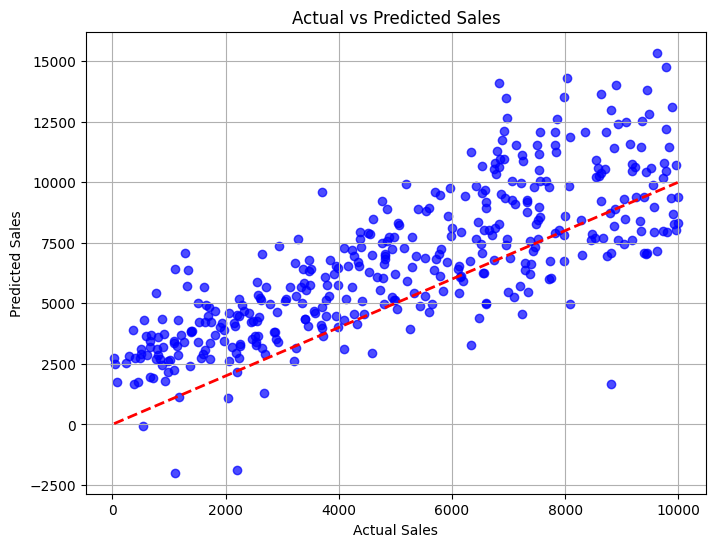

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


In [21]:
X_test

,Region_North,Region_NorthEast,Region_SouthEast,Region_West,Sales Rep_Jeri,Sales Rep_Jon,Sales Rep_Luke,Sales Rep_Rhonda,Sales Rep_Sheliadawn,Sales Rep_Steven,...,Product_ZUU Item,Product_ZVM Item,Product_ZWS Item,Product_ZWZ Item,Product_ZXI Item,Product_ZXT Item,Product_ZYF Item,Product_ZYT Item,Product_ZZU Item,COGS
256,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5773.1677
352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5499.7788
298,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6662.8287
581,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3241.4206
1288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7832.0792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3726.3072
1973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4295.7172
261,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6055.1832
1305,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3328.6859


In [26]:
# Add predictions to the test set for easier grouping
test_data = X_test.copy()
test_data['Actual Sales'] = y_test.values
test_data['Predicted Sales'] = y_pred

# Add product names back to the test set
original_data_with_encoded_columns = pd.concat([data, encoded_df], axis=1)
test_data = test_data.merge(original_data_with_encoded_columns[['Product']], left_index=True, right_index=True)

# Group by product and calculate average actual and predicted sales
grouped_data = test_data.groupby('Product')[['Actual Sales', 'Predicted Sales']].mean().reset_index()

# Display the table
print("Average Actual and Predicted Sales for Each Product:")
print(grouped_data)

# Optional: Use tabulate for a prettier table (requires `tabulate` package)
try:
    from tabulate import tabulate
    print("\nTabulated View:")
    print(tabulate(grouped_data, headers='keys', tablefmt='pretty', showindex=False))
except ImportError:
    print("\nInstall the `tabulate` package for better table formatting: pip install tabulate")


Average Actual and Predicted Sales for Each Product:
      Product  Actual Sales  Predicted Sales
0    AAK Item       4998.52      6192.139489
1    ACD Item       9445.16     13792.889079
2    ACF Item       3954.50      6535.140377
3    AHM Item       9526.53     10601.299184
4    AHN Item       6736.05     10544.857337
..        ...           ...              ...
392  ZND Item       3760.75      6098.711829
393  ZPR Item       6530.53      7067.561409
394  ZQR Item       9923.93      8272.331176
395  ZYF Item       8860.12      8199.583188
396  ZZU Item       2674.87      1311.904534

[397 rows x 3 columns]

Tabulated View:
+----------+--------------+---------------------+
| Product  | Actual Sales |   Predicted Sales   |
+----------+--------------+---------------------+
| AAK Item |   4998.52    |  6192.139488809564  |
| ACD Item |   9445.16    | 13792.889079035403  |
| ACF Item |    3954.5    |  6535.140377083373  |
| AHM Item |   9526.53    | 10601.299183695413  |
| AHN Item |   6